In [1]:
%matplotlib inline
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import norm, skew


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = 10,6

In [2]:
train = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\lr\train.csv')
test = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\lr\test.csv')

# Простая линейная регрессия

## Просмотр и предобработка данных

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
train.shape

(700, 2)

In [5]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
test.shape

(300, 2)

In [7]:
train.isnull().sum()

x    0
y    1
dtype: int64

In [8]:
train['y'].fillna(train['y'].median(), inplace=True)

In [9]:
train.isnull().sum()

x    0
y    0
dtype: int64

In [10]:
test.isnull().sum()

x    0
y    0
dtype: int64

In [11]:
train.describe()

,x,y
count,700.000000,700.000000
mean,54.985939,49.938488
std,134.681703,29.088411
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,48.973020
75%,75.000000,74.880631
max,3530.157369,108.871618


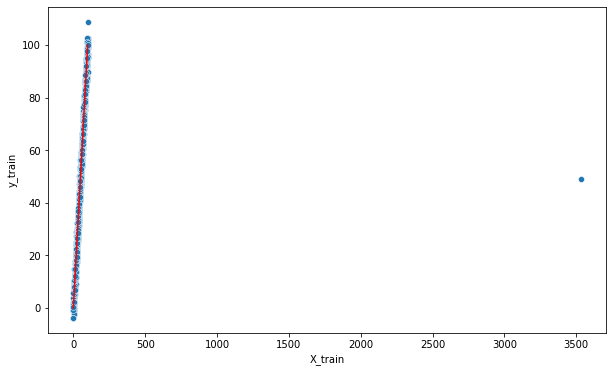

In [12]:
sns.scatterplot(data=train, x='x', y='y')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('X_train')
plt.ylabel('y_train');

Замечен выброс

In [13]:
train = train.drop(train[train['x']>500].index)

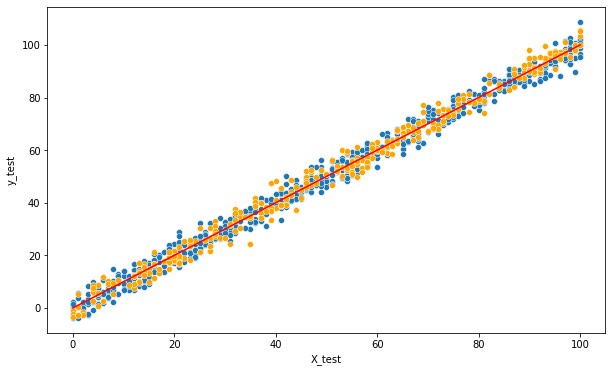

In [14]:
sns.scatterplot(data=train, x='x', y='y')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('X_train')
plt.ylabel('y_train');

sns.scatterplot(data=test, x='x', y='y', color='orange')
plt.xlabel('X_test')
plt.ylabel('y_test');

## Обучение линейной регрессионной модели

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
X_train = np.asarray(train['x']).reshape(-1, 1)
y_train = np.asarray(train['y']).reshape(-1, 1)
X_test = np.asarray(test['x']).reshape(-1, 1)
y_test = np.asarray(test['y']).reshape(-1, 1)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

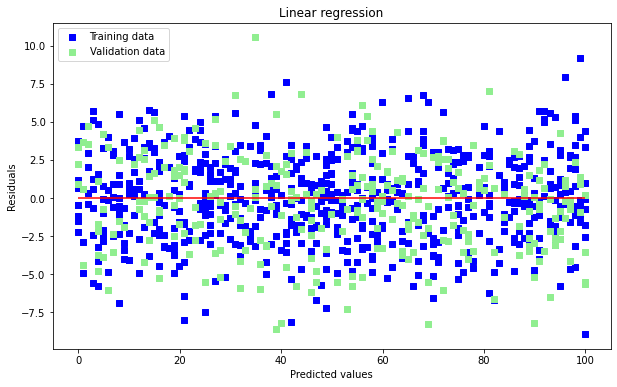

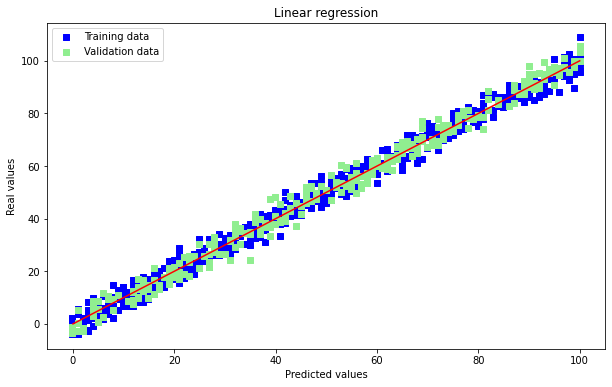

In [19]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 100, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 100], [0, 100], c = "red")
plt.show()

In [20]:
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

9.432922192039317
0.9888014444327563


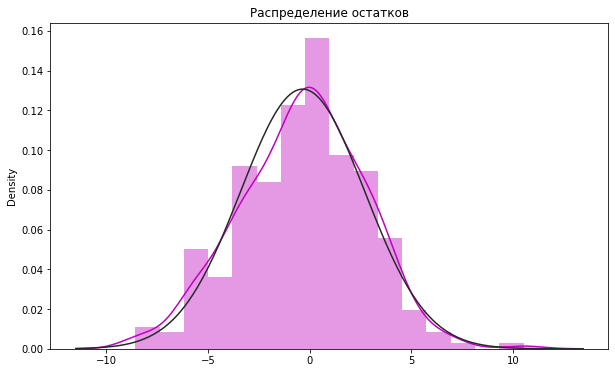

In [21]:
sns.distplot(y_test_pred-y_test, fit=norm, color='m')
plt.title('Распределение остатков');

In [25]:
lr.coef_

array([[1.00065638]])

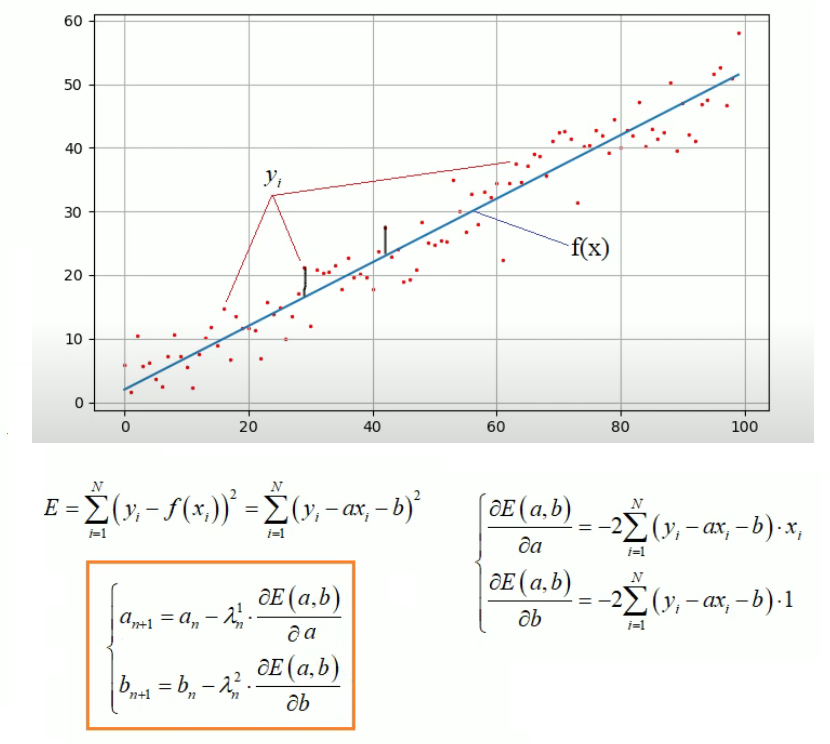

In [26]:
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'R2: {r2_score(y_test, y_test_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')

MSE: 9.432922192039317
R2: 0.9888014444327563
MAE: 2.4157718500412595


# Множественная линейная регрессия

## Просмотр и предобработка данных

### Просмотр и переименование столбцов

In [27]:
df = pd.read_csv('Real Estate.csv')

In [28]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [29]:
df.shape

(414, 8)

In [30]:
df = df.drop(df.columns[0], axis=1)

In [31]:
# Сохраним обозначение столбцов

description = list(df.columns)
description

['X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [32]:
cols = [x[:2].strip() for x in df.columns]
df.columns = cols

In [33]:
df.isnull().sum().sum()

0

In [34]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

In [35]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


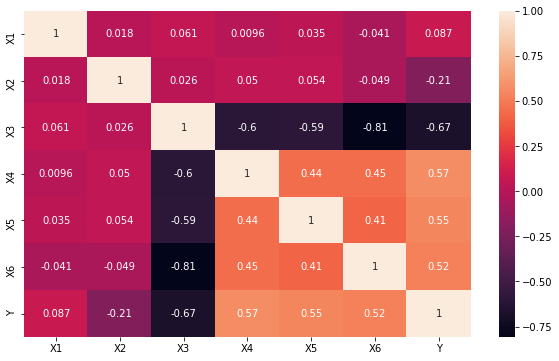

In [36]:
sns.heatmap(df.corr(), annot=True);

In [37]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [38]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')

### Поиск выбросов

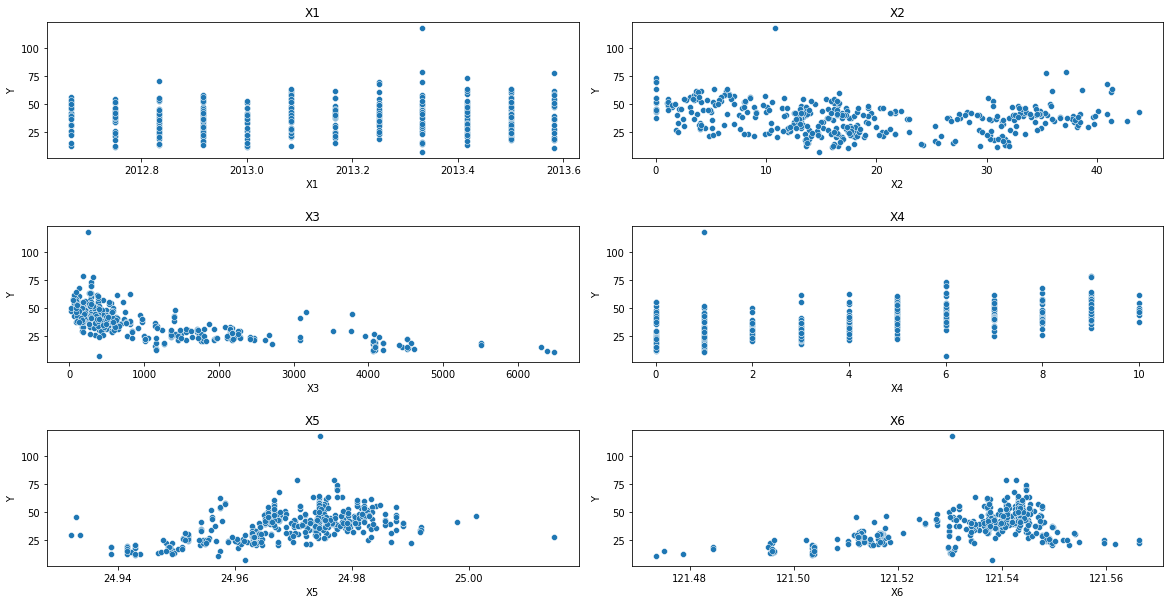

In [39]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for n, f in enumerate(df.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.scatterplot(x=df[f], y=df['Y'])
    plt.title(f)

In [40]:
# Удалим выброс, где цена около 120

df = df.drop(df[df['Y']>110].index)

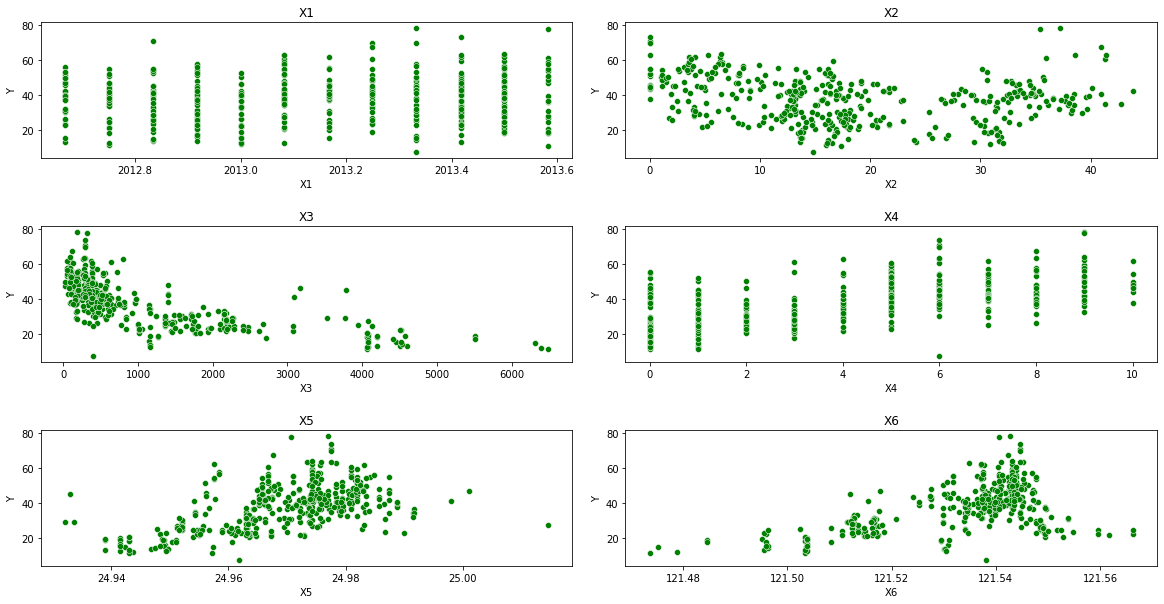

In [41]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for n, f in enumerate(df.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.scatterplot(x=df[f], y=df['Y'], color='g')
    plt.title(f)

### Распределение признаков

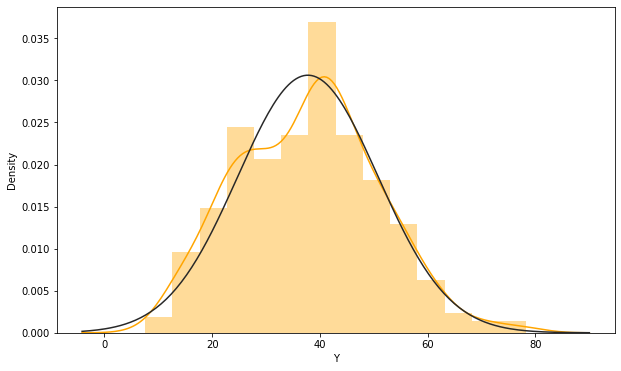

In [42]:
sns.distplot(df['Y'], fit=norm, color='orange');

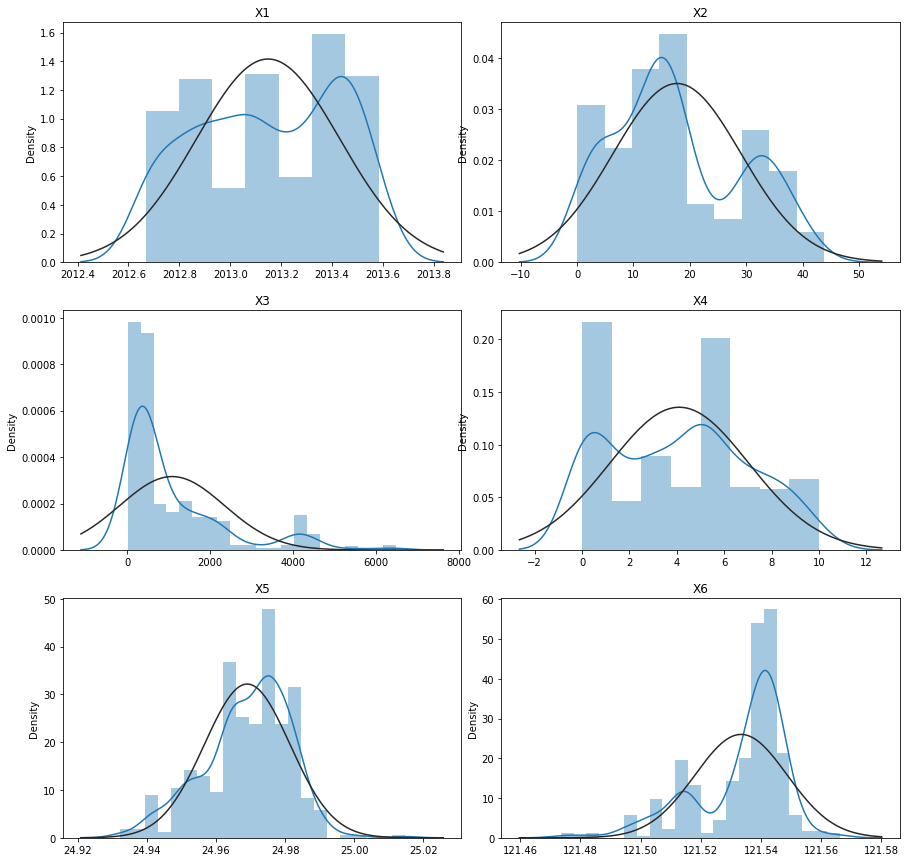

In [43]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

for n, f in enumerate(df.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.distplot(x=df[f], fit=norm)
    plt.title(f)

Распределения многих признаков далеки от нормального

In [44]:
df1 = df.copy()

In [45]:
for f in df1.columns:
    df1[f] = df1[f].apply(np.log1p)

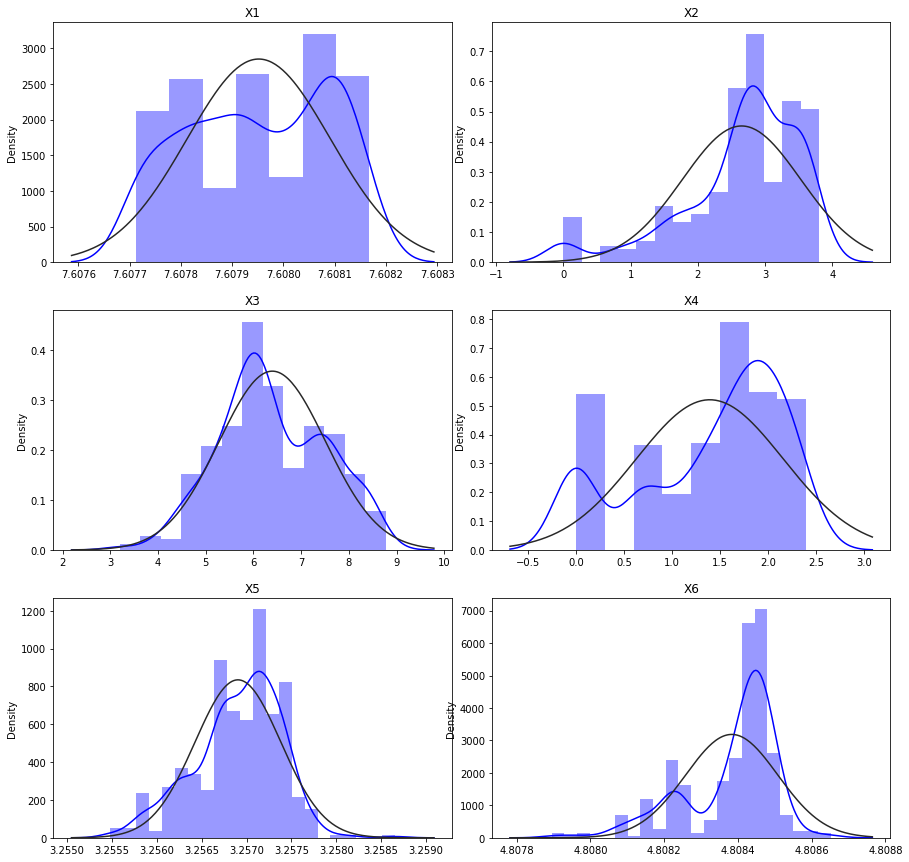

In [46]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

for n, f in enumerate(df1.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.distplot(x=df1[f], fit=norm, color='b')
    plt.title(f)

Распределения стали чуть ближе к нормальному

## Множественная линейная регрессия. Строим модель

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

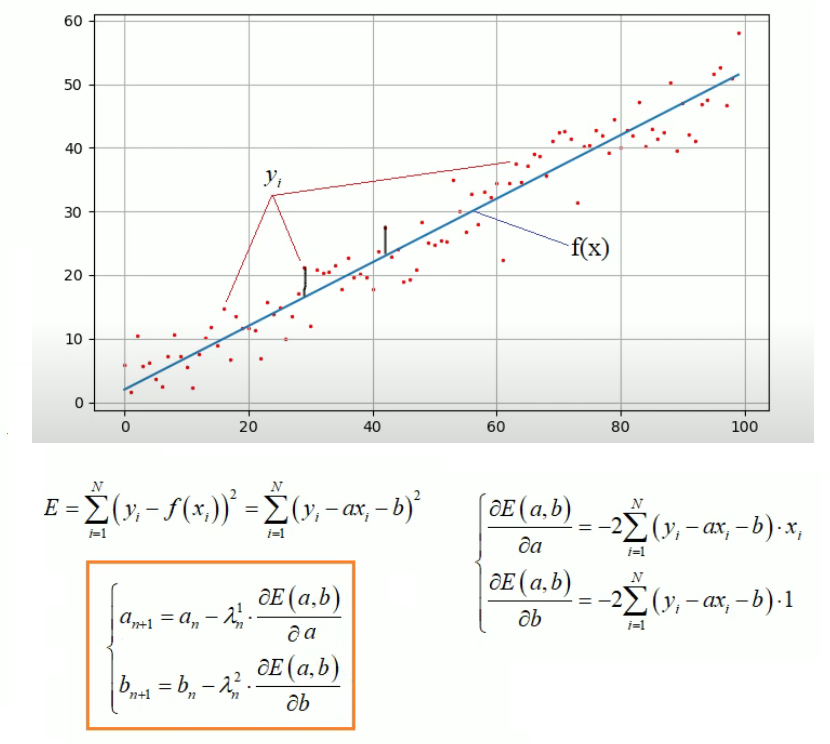

In [48]:
X1 = df1.drop(columns='Y', axis=1)
y1= df1['Y']

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3) 

In [55]:
mlr = LinearRegression()
mlr.fit(X1_train, y1_train)

LinearRegression()

In [56]:
X1_train.head()

,X1,X2,X3,X4,X5,X6
78,7.607837,3.668677,6.316148,1.098612,3.257172,4.808387
321,7.607837,2.884801,6.872905,1.609438,3.257663,4.808389
75,7.608126,2.587764,7.216077,0.693147,3.256250,4.808506
175,7.607919,3.440418,6.159464,1.386294,3.256944,4.808418
178,7.608126,2.646175,7.043541,1.609438,3.257780,4.808393


In [57]:
X1_test.head()

,X1,X2,X3,X4,X5,X6
406,7.607961,1.064711,5.921950,2.079442,3.257055,4.808440
168,7.607919,3.353407,6.246324,1.791759,3.256672,4.808464
287,7.607878,3.005683,6.135785,1.791759,3.256335,4.808437
269,7.607878,2.923162,6.731881,0.000000,3.256686,4.808500
410,7.607713,1.887070,4.515859,2.302585,3.257109,4.808463


In [58]:
y1_train.head()

78     3.427515
321    3.655840
75     3.417727
175    3.624341
178    3.629660
Name: Y, dtype: float64

In [59]:
y1_test.head()

406    3.725693
168    3.648057
287    3.523415
269    3.178054
410    3.931826
Name: Y, dtype: float64

In [60]:
y1_train_pred = mlr.predict(X1_train)
y1_test_pred = mlr.predict(X1_test)

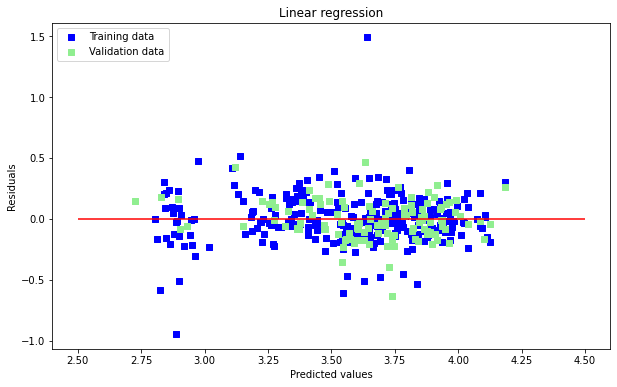

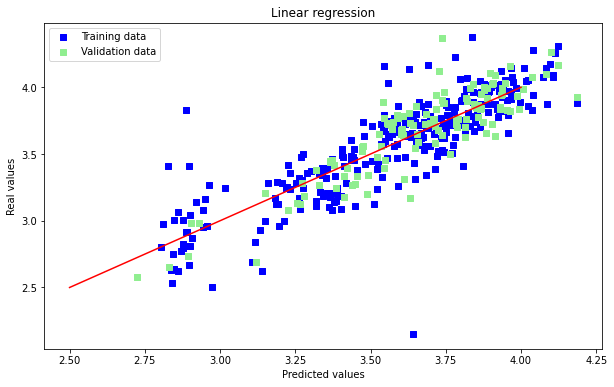

In [61]:
# Plot residuals
plt.scatter(y1_train_pred, y1_train_pred - y1_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y1_test_pred, y1_test_pred - y1_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2.5, xmax = 4.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y1_train_pred, y1_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y1_test_pred, y1_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.5, 4], [2.5, 4], c = "red")
plt.show()

In [62]:
mlr.coef_

array([ 2.95223713e+02, -9.50023210e-02, -1.42282590e-01,  5.13133939e-02,
        2.47288144e+02,  3.45762015e+02])

In [63]:
print(f'MSE: {mean_squared_error(y1_test, y1_test_pred)}')
print(f'R2: {r2_score(y1_test, y1_test_pred)}')
print(f'MAE: {mean_absolute_error(y1_test, y1_test_pred)}')

MSE: 0.024648389888884972
R2: 0.779463316127905
MAE: 0.12272933891745312


In [65]:
mlr.score(X1_test, y1_test)

0.779463316127905